Задание 1. Граф с обходом в ширину (BFS)

In [ ]:
from collections import deque

def bfs0(start, graph):
    visited = set()
    queue = deque([start])
    
    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            print(vertex, end=" ")
            visited.add(vertex)
            for neighbor in graph[vertex]:
                if neighbor not in visited:
                    queue.append(neighbor)

graph = {
    0: [1, 2],
    1: [0, 3, 4],
    2: [0, 4],
    3: [1, 5],
    4: [1, 2, 5],
    5: [3, 4]
}

bfs0(0, graph)


In [ ]:
def bfs1(start, graph):
    visited = set()
    queue = [start]

    while queue:
        vertex = queue.pop(0) 
        if vertex not in visited:
            print(vertex, end=" ")
            visited.add(vertex)
            for neighbor in graph[vertex]:
                if neighbor not in visited:
                    queue.append(neighbor) 

graph = {
    0: [1, 2],
    1: [0, 3, 4],
    2: [0, 4],
    3: [1, 5],
    4: [1, 2, 5],
    5: [3, 4]
}

bfs0(0, graph)


In [ ]:
def bfs2(start, graph):
    visited = set()
    queue = [start]
    head_index = 0 

    while head_index < len(queue):
        vertex = queue[head_index]
        head_index += 1

        if vertex not in visited:
            print(vertex, end=" ")
            visited.add(vertex)
            for neighbor in graph[vertex]:
                if neighbor not in visited:
                    queue.append(neighbor)


In [ ]:
#Тестирование в разными графами
# 1. Простой ненаправленный граф
graph = {
    0: [1, 2],
    1: [0, 3, 4],
    2: [0, 4],
    3: [1, 5],
    4: [1, 2, 5],
    5: [3, 4]
}
print(bfs2(0, graph))
# 2. Граф с несколькими компонентами связности
graph2 = {
    0: [1],
    1: [0, 2],
    2: [1],
    3: [4],
    4: [3, 5],
    5: [4]
}
print(bfs2(0, graph2))
# 3. Направленный граф
graph3 = {
    0: [1],
    1: [2, 3],
    2: [4],
    3: [],
    4: [1]
}
print(bfs2(0, graph3))
# 4. Ненаправленный граф "Звезда"
graph4 = {
    0: [1, 2, 3, 4],
    1: [0],
    2: [0],
    3: [0],
    4: [0]
}
print(bfs2(0, graph4))
# 5. Полный граф
graph5 = {
    0: [1, 2, 3],
    1: [0, 2, 3],
    2: [0, 1, 3],
    3: [0, 1, 2]
}
print(bfs2(1, graph5))

Задание 2. Построить блок-схему для поиска в графе в глубину(DFS)

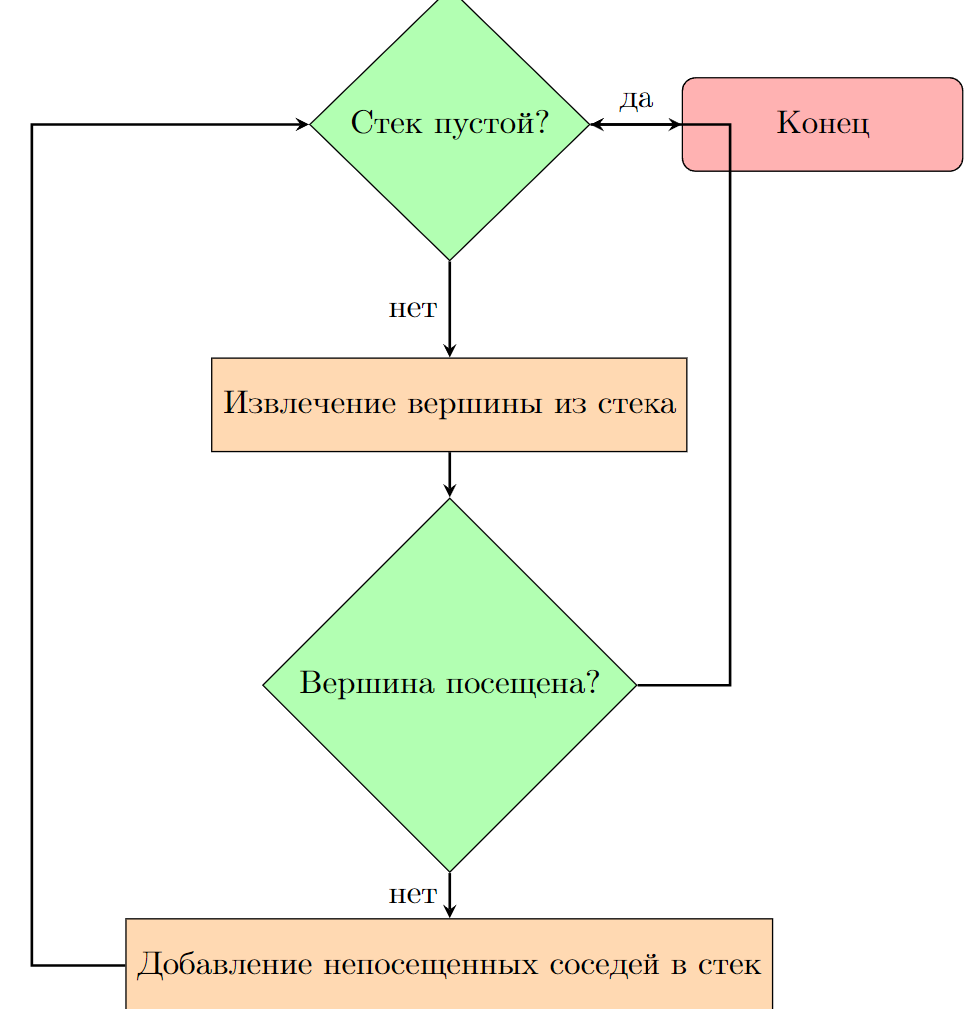

Задание 3. Граф G(V, E) задан в виде [0:{}, 1:{i, j, ...}, ..., n:{k, l, ...}]. Построить графики времени обхода соседей для каждой вершины в зависимости от количества вершин и ребер. Требуется показать, что асимптотическая сложность -- O(V+E)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import random

# Функция для генерации случайного графа
def generate_random_graph(n, p):
    """ Генерация случайного графа с n вершинами и вероятностью ребра p """
    return nx.erdos_renyi_graph(n, p)

# Функция для измерения времени обхода всех соседей каждой вершины
def measure_traversal_time(graph):
    """ Измерение времени обхода всех соседей каждой вершины в графе """
    start_time = time.time()
    for node in graph.nodes():
        neighbors = list(nx.neighbors(graph, node))
    return time.time() - start_time

# Генерируем графы разного размера и измеряем время обхода
vertices = range(10, 101, 10)  # Количество вершин от 10 до 100 с шагом 10
edge_prob = 0.2  # Фиксированная вероятность наличия ребра между двумя вершинами
times = []

for v in vertices:
    G = generate_random_graph(v, edge_prob)
    t = measure_traversal_time(G)
    times.append(t)

# Построение графика времени обхода от количества вершин
plt.figure(figsize=(10, 6))
plt.plot(vertices, times, marker='o')
plt.title('Время обхода соседей от количества вершин')
plt.xlabel('Количество вершин')
plt.ylabel('Время обхода (секунды)')
plt.grid(True)
#plt.show()


Задача 4. Профессор Шнурников

In [ ]:
from collections import deque
def can_students_be_divided_from_input():

    n, m = map(int, input("Enter number of students and exchanges: ").split())
    
    graph = {i: [] for i in range(1, n+1)}
    
    for _ in range(m):
        u, v = map(int, input("Enter pair of students exchanging notes: ").split())
        graph[u].append(v)
        graph[v].append(u)
    

    def is_bipartite(graph):
        colors = {}
        def bfs(start):
            queue = deque([start])
            colors[start] = 0  
            while queue:
                vertex = queue.popleft()
                for neighbour in graph[vertex]:
                    if neighbour not in colors:  
                        colors[neighbour] = 1 - colors[vertex]  
                        queue.append(neighbour)
                    elif colors[neighbour] == colors[vertex]:  
                        return False 
            return True

        for node in graph:
            if node not in colors:  
                if not bfs(node):
                    return False
        return True
    return "YES" if is_bipartite(graph) else "NO"
result = can_students_be_divided_from_input()
print(result)

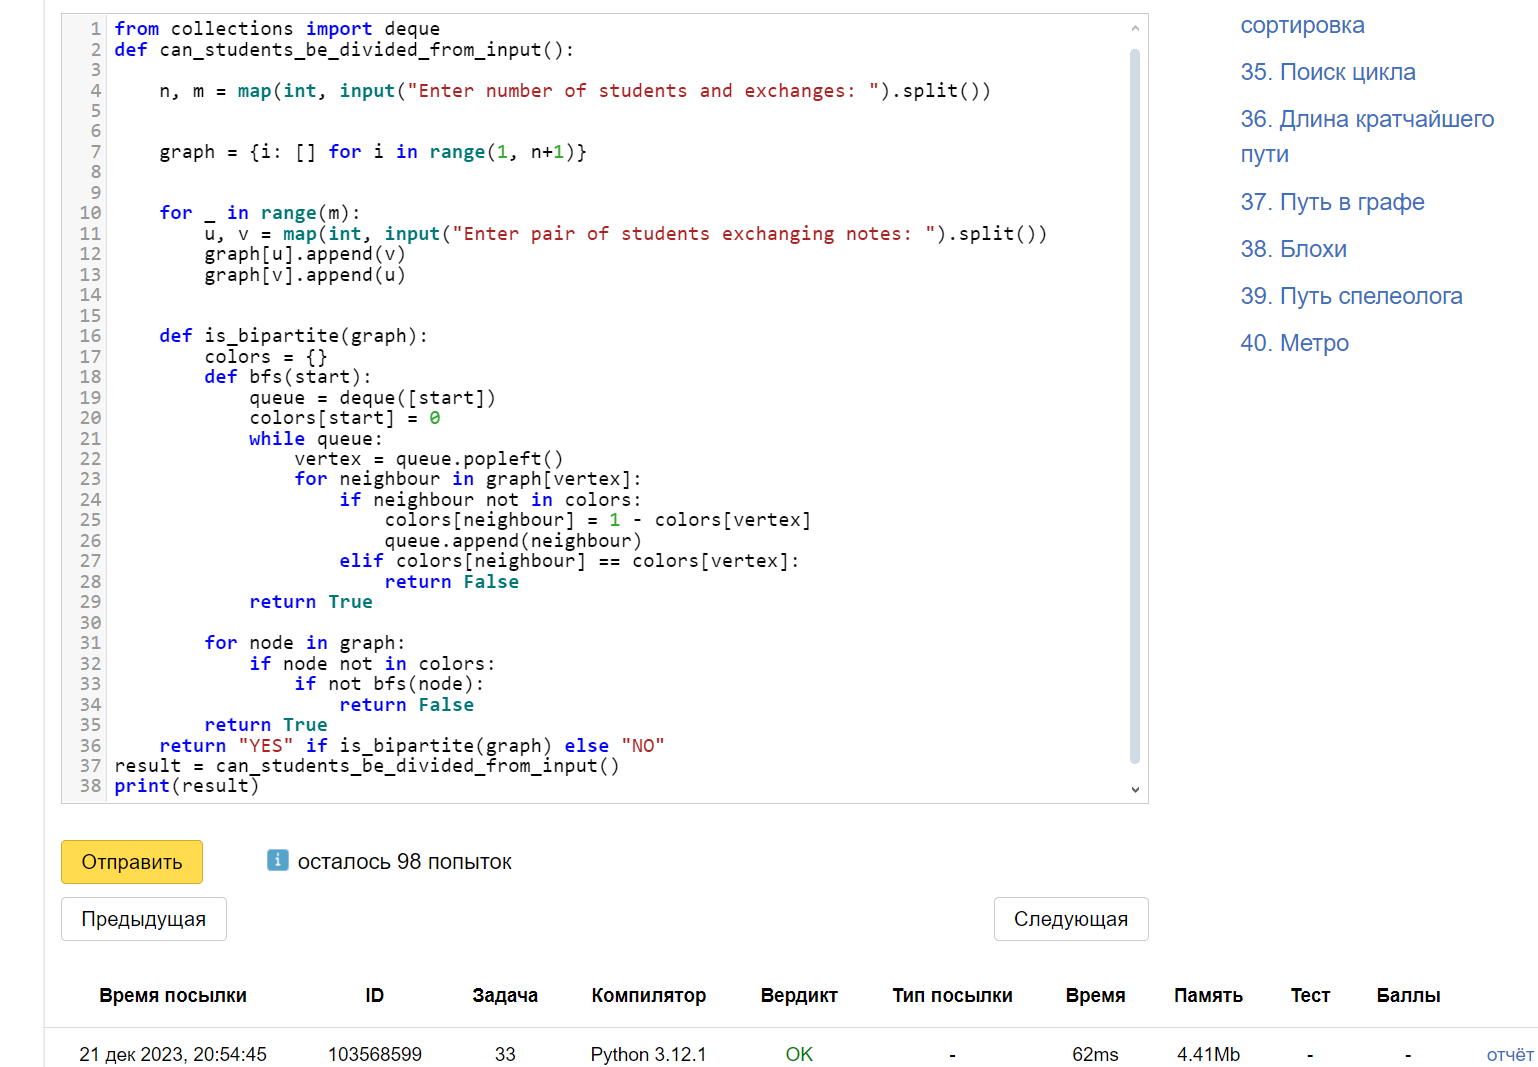